In [7]:
# load virtual python env
!source ./bin/activate

2088.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [62]:
# importing python libs

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

#calling decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
#from sklearn.svm import SVC

import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [4]:
url = "https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv"
df = pd.read_csv(url)

#print first 5 rows
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [6]:
df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [7]:
df.tail()

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [8]:
df[['Age','Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [9]:
# Using data frame Iloc

df.iloc[:0]

,Country,Age,Salary,Purchased


In [10]:
df.iloc[:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [11]:
#the inputs are ranges
df.iloc[1:,0:2]

,Country,Age
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0
10,Germany,28.0


In [12]:
# the last number in the range is excluded

input_features = df.iloc[:,0:3].values
label = df.iloc[:,-1].values

In [13]:
print(label)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'Yes' 'No']


In [14]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 nan]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [15]:
# fixing age missing value

jenc_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
input_features

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0],
       ['Germany', 28.0, 49000.0],
       ['France', 42.0, 75000.0],
       ['Spain', 33.0, 56000.0],
       ['Germany', 45.0, 77000.0],
       ['France', 29.0, 51000.0],
       ['Spain', 51.0, 85000.0],
       ['Germany', 36.0, nan],
       ['France', 31.0, 55000.0],
       ['Spain', 39.0, 63000.0],
       ['Germany', 47.0, 80000.0],
       ['France', 26.0, 47000.0],
       ['Spain', 32.0, 53000.0],
       ['Germany', 41.0, 71000.0],
       ['France', 49.0, 82000.0],
       ['Spain', 34.0, 57000.0],
       ['Germany', 43.0, 74000.0],
       ['France', 52.0, 88000.0],
       ['Spain', 46.0, 78000.0],
       ['Germany', 25.0, 45000.0],
       ['France', 53.0

In [16]:
jenc_impute.fit(input_features[:,1:3]) # calculate the missing values

input_features[:,1:3] = jenc_impute.transform(input_features[:,1:3])

In [17]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [18]:
# Features and labels
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [19]:
# Converting two values to binary
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [20]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [21]:
input_features=np.array(ct.fit_transform(input_features))
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [22]:
# finally we have input and label this one we can train to Machine Learning ALgo
training_input,testing_input,train_label,test_label=train_test_split(input_features,label,test_size=0.1) # 90% features, 10% features unknown to model, 90% labels, 10% labels unknown to model
# note test_size (0 to 1) --- 0.1 means 10% testing data size

In [23]:
# Calling DecisionTree classifier
classifier = DecisionTreeClassifier()

In [24]:
# Training classifier with above preprocessed split data
trained_model = classifier.fit(training_input, train_label)

In [25]:
predicted_values = trained_model.predict(testing_input)

In [26]:
print(predicted_values)

[0 0 0]


In [27]:
# actual values
print(test_label)

[0 1 0]


In [28]:
# Using accuracy score 
accuracy_score(test_label, predicted_values)
# 0.33 means 33% accuracy score

0.6666666666666666

In [29]:
# testing by input new random data - try as homework
jenc_new_data = np.array([['Spain', '39','51000']])

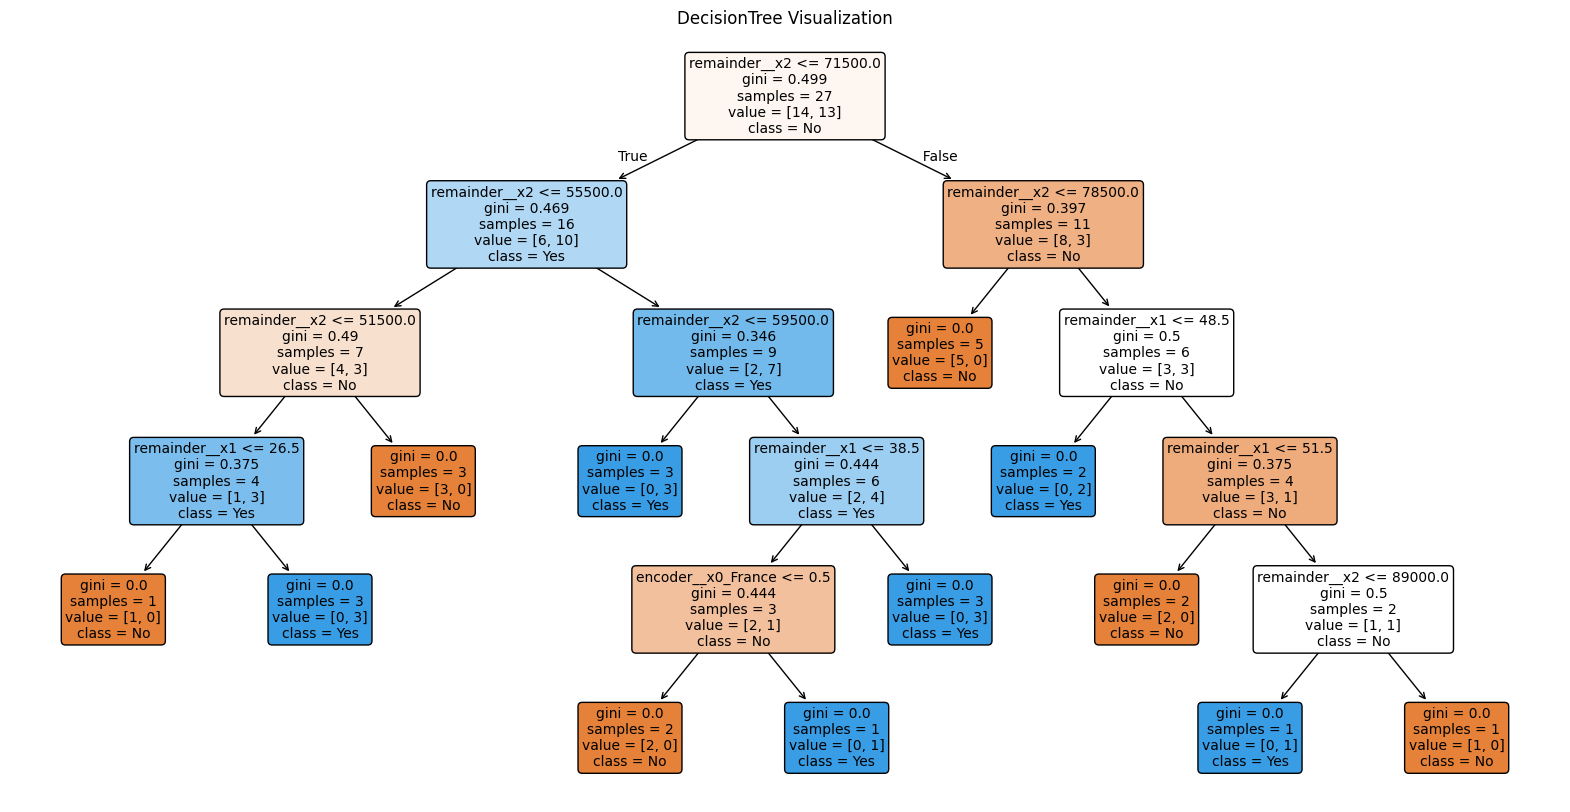

In [30]:
# We can use python to check Decision Tree Graph
plt.figure(figsize=(20,10))
plot_tree(classifier,
          feature_names=ct.get_feature_names_out(),
          class_names=le.classes_,
          filled=True,
          fontsize=10,
          rounded=True)
plt.title("DecisionTree Visualization")
plt.show()

In [31]:
# features and labels
# printing names
le.classes_

array(['No', 'Yes'], dtype=object)

In [32]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)

In [33]:
jenc_impute.fit(input_features[:,1:3]) # calculate the missing values

input_features[:,1:3] = jenc_impute.transform(input_features[:,1:3])

## USGS Earthquakes Example

In [34]:
df2 = pd.read_csv("https://delvex-software-center.s3.ap-south-1.amazonaws.com/USGS/all_month.csv")

df2.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-03T03:16:50.230Z,38.840668,-122.834335,1.32,0.53,md,6.0,122.0,0.002262,0.01,...,2025-04-03T03:18:28.928Z,"10 km NNW of The Geysers, CA",earthquake,0.61,1.23,0.310,9.0,automatic,nc,nc
1,2025-04-03T03:08:03.540Z,61.556800,-141.271600,13.40,1.20,ml,NaN,NaN,NaN,0.20,...,2025-04-03T03:10:11.692Z,"88 km E of McCarthy, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
2,2025-04-03T02:59:56.724Z,61.789200,-149.608200,38.70,1.20,ml,NaN,NaN,NaN,0.53,...,2025-04-03T03:01:20.110Z,"18 km N of Meadow Lakes, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
3,2025-04-03T02:54:35.248Z,60.081400,-152.528700,97.80,1.40,ml,NaN,NaN,NaN,0.46,...,2025-04-03T02:57:27.690Z,"46 km WNW of Happy Valley, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2025-04-03T02:41:42.280Z,35.639833,-117.548500,8.08,0.89,ml,19.0,63.0,0.092800,0.13,...,2025-04-03T02:45:07.322Z,"12 km E of Ridgecrest, CA",earthquake,0.21,0.86,0.161,16.0,automatic,ci,ci


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [36]:
np.isnan(df2.iloc[:,4].values).sum()

np.int64(1)

In [37]:
# the last number in the range is excluded

input_features = df2.iloc[:,1:4].values
label = df2.iloc[:,4].values

In [38]:
print(input_features)

[[  38.84066772 -122.83433533    1.32000005]
 [  61.5568     -141.2716       13.4       ]
 [  61.7892     -149.6082       38.7       ]
 ...
 [  44.726      -111.12066667    2.38      ]
 [ -57.2885      147.3275       10.        ]
 [  39.3605     -111.1945       -0.61      ]]


In [39]:
print(label)

[ 0.53  1.2   1.2  ... -0.92  4.5   1.44]


In [40]:
# fixing missing value

jenc_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
label

array([ 0.53,  1.2 ,  1.2 , ..., -0.92,  4.5 ,  1.44], shape=(9593,))

In [41]:
jenc_impute.fit(label.reshape(-1, 1))  # fit expects 2D

label = jenc_impute.transform(label.reshape(-1, 1)).ravel()  # flatten back to 1D

In [42]:
# finally we have input and label this one we can train to Machine Learning ALgo
training_input,testing_input,train_label,test_label=train_test_split(input_features,label,test_size=0.1) # 90% features, 10% features unknown to model, 90% labels, 10% labels unknown to model
# note test_size (0 to 1) --- 0.1 means 10% testing data size

In [43]:
# Calling DecisionTree classifier
classifier = DecisionTreeRegressor()

In [44]:
# Training classifier with above preprocessed split data
trained_model = classifier.fit(training_input, train_label)

In [45]:
predicted_values = trained_model.predict(testing_input)

In [46]:
print(predicted_values)

[ 1.    1.3   3.6   1.5   1.98  0.35  1.93  1.4   1.26 -0.41  1.92  2.5
  0.87  4.3   1.3   0.41 -0.7   5.3   4.6   1.33  1.4   5.    0.57  1.85
  1.03  1.8   0.75  1.4   0.65  1.4   0.63  1.17  1.44  1.48  1.6  -0.08
  1.74  0.49  0.15  2.1   0.77  3.1   0.81  0.36 -0.2   2.16  1.2   1.6
  1.77  0.13  1.25  0.5   1.2   0.7   0.98  0.68  2.22  0.98  0.75  4.1
  0.76  1.5   1.7   0.27  0.93  2.    4.7   4.9   5.2   0.81  1.2  -0.25
  0.37  1.18 -0.98  0.62  4.8   1.29  1.05  1.6   0.92  4.1  -0.6   2.1
  0.76  1.24  0.81  1.    2.1  -0.82  1.02  1.08 -0.66  1.1   0.27  1.32
  2.    0.89  1.06  0.88  1.6   4.6   0.77  1.86  0.8   1.2   0.89  0.94
  0.28  0.58 -0.1   0.53  1.7   3.06  0.4   1.5   4.6   1.3   0.18  0.84
  4.3  -0.15  1.31  0.33  2.14  2.71  0.5   1.7   0.74  0.16  0.9   0.75
  1.7   1.69  1.03  0.9   0.36  0.31  2.12  1.    2.31  1.3   5.3   0.32
  1.54  2.04  1.3   0.78  1.5   1.69  0.12  0.41  1.5   1.48 -0.8   1.08
  0.87  1.5   5.3   2.1   1.3  -0.68  1.6   1.4  -0.75 

In [47]:
# actual values
print(test_label)

[ 0.79  1.8   2.8   1.7   0.66  0.63  0.9   1.8   0.97 -0.41  0.56  1.4
  1.7   3.1   1.49  1.08  0.41  4.8   4.1  -0.06  1.8   4.4   1.33  0.76
  0.76  3.4   1.65  1.7   0.56  2.    1.8   2.69  0.43  1.83  1.7   0.67
  1.11  0.01  0.13  2.4   1.1   2.7   2.48  0.28 -0.11  2.39  1.2   1.5
  0.64  0.8   0.06  0.44  1.8   1.2   0.58  1.08  2.24  1.28  0.76  4.2
  0.49  1.2   3.    1.27  1.34  2.2   4.3   4.4   3.    1.71  1.3   0.09
  0.77  0.26 -0.9   0.85  4.4   0.97  1.26  1.8   1.68  4.5  -0.57  1.7
  0.78  1.16  2.36  1.3   1.9   0.49  0.32  0.28 -0.23  1.16  1.1   0.76
  1.7   0.58  1.26  1.55  1.4   3.9   0.7   0.61  0.6   1.2   0.77  1.03
  0.35  0.38 -0.4   1.    1.6   3.24  0.24  1.6   4.1   1.1  -0.31  1.22
  4.3   0.18  1.24  0.71  2.3   1.35  0.96  1.3   1.45 -0.2   1.2   1.36
  2.4   1.44  1.34  1.    0.49  0.96  1.92  1.7   1.64  1.8   4.1  -0.21
  0.78  3.38  1.33  1.09  1.6   1.11  0.5   0.29  2.1   0.73  0.3   0.9
  1.2   1.4   4.3   1.9   2.    0.21  3.4   1.1  -0.64  

In [48]:
# Assessing accuracy

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(test_label, predicted_values))
print("R²:", r2_score(test_label, predicted_values))


MSE: 0.4671466666666666
R²: 0.7250739527027668


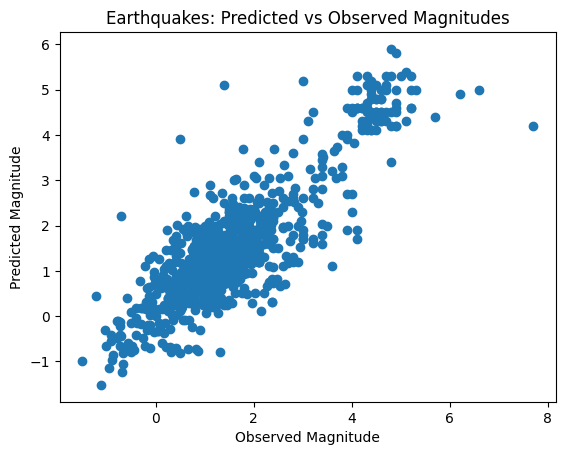

In [49]:
plt.xlabel('Observed Magnitude')
plt.ylabel('Predicted Magnitude')
plt.scatter(test_label,predicted_values) # for line plot
plt.title('Earthquakes: Predicted vs Observed Magnitudes')
plt.show()

## Other way

In [50]:
# Choose features and labels for regression
features = ['latitude','longitude','depth']
label = 'mag'

In [51]:
df2.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [52]:
# data pre-processing
df2 = df2.dropna(subset=[label])

In [53]:
# Filling NAN features
for col in features:
    df2[col] = df2[col].fillna(df2[col].median())

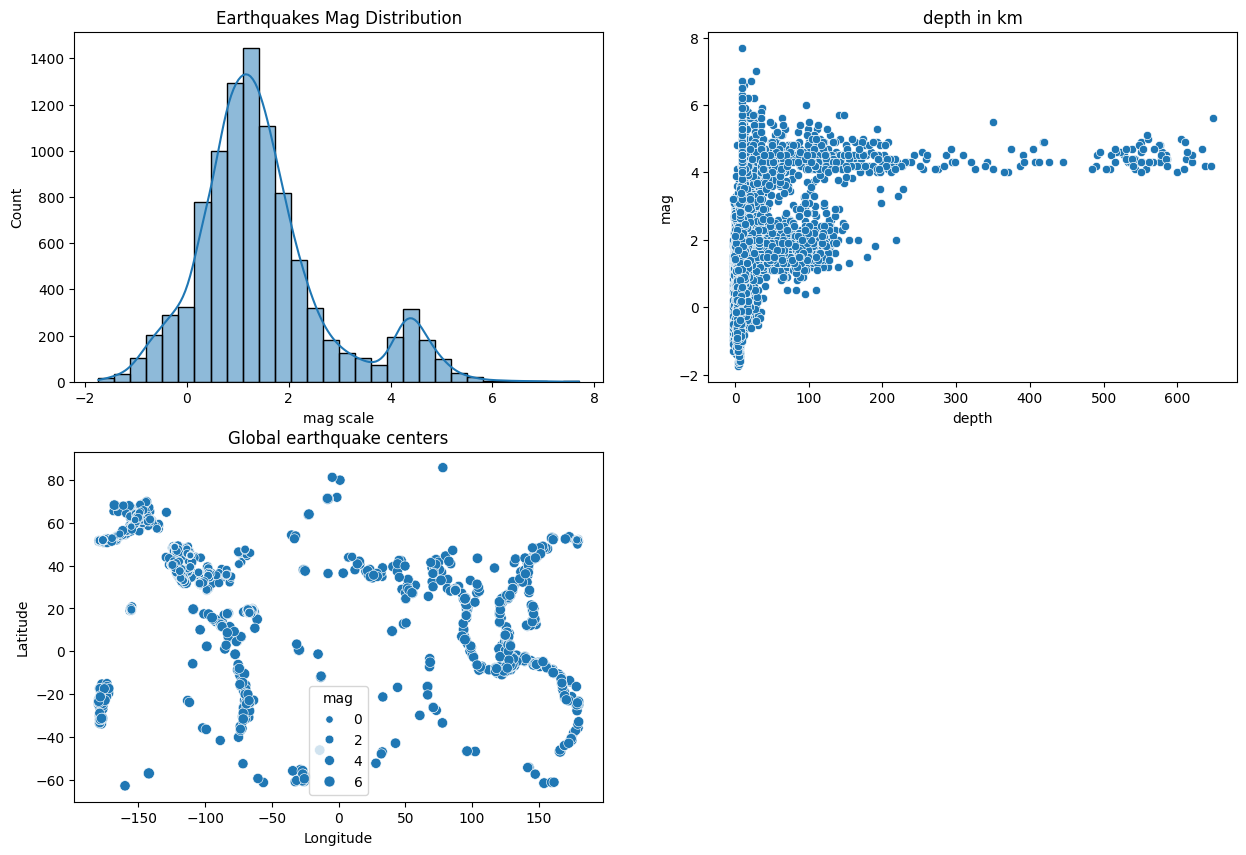

In [54]:
plt.figure(figsize=(15,10))

#first plot --subplots
plt.subplot(2,2,1)
plt.title("Earthquakes Mag Distribution")
plt.xlabel("mag scale")
sb.histplot(df2[label],kde=True,bins=30)
#second plot
plt.subplot(2,2,2)
plt.title("Depth vs Mag")
plt.title("depth in km")
sb.scatterplot(x='depth',y=label,data=df2)

#Globe locations
plt.subplot(2,2,3)
plt.title("Global earthquake centers")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
sb.scatterplot(x="longitude",y="latitude",size=label,data=df2)

plt.show()

# Random Forest - Polynomial Regression Approach

In [55]:
# reconsidering features and labels

feature_data = df2[features]
label_data = df2[label]
feature_data

,latitude,longitude,depth
0,38.840668,-122.834335,1.32
1,61.556800,-141.271600,13.40
2,61.789200,-149.608200,38.70
3,60.081400,-152.528700,97.80
4,35.639833,-117.548500,8.08
...,...,...,...
9588,44.739000,-111.123333,7.15
9589,37.428500,-119.018500,3.69
9590,44.726000,-111.120667,2.38
9591,-57.288500,147.327500,10.00


In [56]:
# split and train and test data

train_ft,test_ft,train_lb,test_lb = train_test_split(feature_data, label_data, test_size=0.2, random_state=100)

In [57]:
# Calling regression model

regr_model = RandomForestRegressor()

In [58]:
# training model

trained_model = regr_model.fit(train_ft, train_lb)

In [59]:
print("actual mag : values",test_lb)

actual mag : values 8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [60]:
predicted_mag = trained_model.predict(test_ft)
print(predicted_mag)

[0.9646 1.5102 0.0117 ... 1.602  1.278  0.8702]


In [61]:
print(test_lb)

8646    1.03
995     1.38
553     0.20
4322    2.10
2589    0.58
        ... 
5284    1.50
6501    1.83
6448    1.40
64      0.80
1501    1.12
Name: mag, Length: 1919, dtype: float64


In [63]:
error = mean_squared_error(test_lb, predicted_mag)
print("error", error)

error 0.23857968607069419


In [64]:
# Only 4 points
print(f"Model MSE : {error:.4f}")

Model MSE : 0.2386
